<a href="https://colab.research.google.com/github/AYOUBSEDDOUKI/AYOUBSEDDOUKI/blob/main/kernel_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [ ]:
#1-D normal Python
import math

'''Class for Gaussian Kernel Regression'''
class GKR:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
    
    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/math.sqrt(2*math.pi))*math.exp(-0.5*z**2)
    
    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = [self.gaussian_kernel((xi-X)/self.b) for xi in self.x]
        weights = [len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels]
        return np.dot(weights, self.y)/len(self.x)
    
    def visualize_kernels(self, precision):
        plt.figure(figsize = (10,5))
        for xi in self.x:
            x_normal = np.linspace(xi - 3*self.b, xi + 3*self.b, precision)
            y_normal = stats.norm.pdf(x_normal, xi, self.b)
            plt.plot(x_normal, y_normal, label='Kernel at xi=' + str(xi))
            
        plt.ylabel('Kernel Weights wi')
        plt.xlabel('x')
        plt.legend()
    
    def visualize_predictions(self, precision, X):
        plt.figure(figsize = (10,5))
        max_y = 0
        for xi in self.x:
            x_normal = np.linspace(xi - 3*self.b, xi + 3*self.b, precision)
            y_normal = stats.norm.pdf(x_normal, xi, self.b)
            max_y = max(max(y_normal), max_y)
            plt.plot(x_normal, y_normal, label='Kernel at xi=' + str(xi))
            
        plt.plot([X,X], [0, max_y], 'k-', lw=1,dashes=[2, 2])
        plt.ylabel('Kernel Weights wi')
        plt.xlabel('x')
        plt.legend()

In [ ]:
gkr = GKR([11,22,33,44,50,56,67,70,78,89,90,100], [2337,2750,2301,2500,1700,2100,1100,1750,1000,1642, 2000,1932], 10)
print(gkr.predict(11))
print(gkr.predict(22))
print(gkr.predict(33))
print(gkr.predict(44))
print(gkr.predict(50))
print(gkr.predict(56))
print(gkr.predict(67))
print("************************")
print(gkr.predict(75))
print("************************")

print(gkr.predict(78))
print(gkr.predict(89))
print(gkr.predict(90))
print(gkr.predict(100))



2472.807655061694
2515.947422934514
2379.953536373073
2148.2595494004413
2006.372202463007
1836.180519960254
1518.2497311065001
************************
1443.989652207334
************************
1466.5938254519344
1682.5345789562355
1702.3338497962222
1840.9077612941958


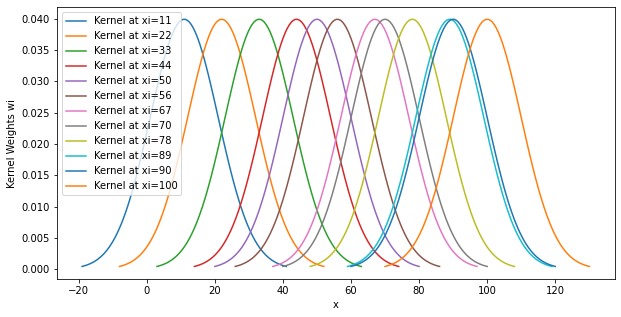

In [ ]:
gkr.visualize_kernels(100)


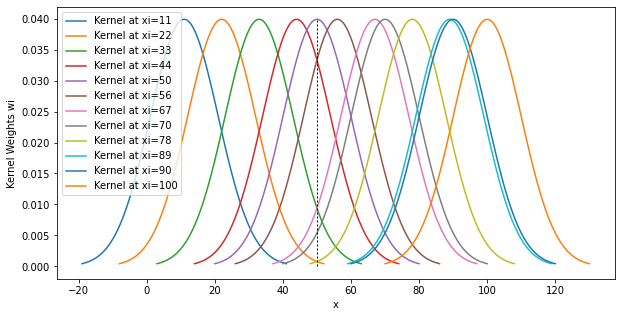

In [ ]:
gkr.visualize_predictions(100, 50)


In [ ]:
%%time 
gkr.predict(50)

CPU times: user 343 µs, sys: 48 µs, total: 391 µs
Wall time: 406 µs


2006.372202463007

In [ ]:
%%time
gkr.predict(11)

CPU times: user 1.48 ms, sys: 0 ns, total: 1.48 ms
Wall time: 1.35 ms


2472.807655061694

In [ ]:
%%time
gkr.predict(100)

CPU times: user 1.54 ms, sys: 0 ns, total: 1.54 ms
Wall time: 1.55 ms


1840.9077612941958